<a href="https://colab.research.google.com/github/bismillahkani/ISL-CV-Team3/blob/master/ASL_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing data

In [0]:
import os
import zipfile

local_zip = '/content/drive/My Drive/ISL/asl-alphabet.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Import libraries

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras import regularizers

Using TensorFlow backend.


Visualize data

In [6]:
alphabet = 'H'

alphabet_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/' + alphabet)

print('total training alphabet A images:', len(os.listdir(alphabet_dir)))

alphabet_files = os.listdir(alphabet_dir)
print(alphabet_files[:10])

total training alphabet A images: 3000
['H2107.jpg', 'H2738.jpg', 'H1925.jpg', 'H2003.jpg', 'H2885.jpg', 'H482.jpg', 'H90.jpg', 'H2198.jpg', 'H121.jpg', 'H286.jpg']


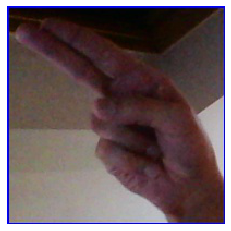

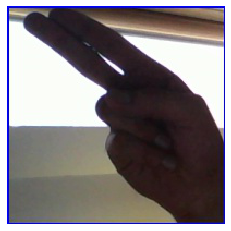

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_alphabet = [os.path.join(alphabet_dir, fname) 
                for fname in alphabet_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_alphabet):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Image Generator

In [8]:
data_dir = "/tmp/asl_alphabet_train/asl_alphabet_train"
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 29
val_frac = 0.2
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [0]:
#input_size = (200,200)
#input_dims = (200,200,3)
#numclasses = 29

#TRAINING_DIR = '/tmp/asl_alphabet_train/asl_alphabet_train'
#datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

#train_generator = datagen.flow_from_directory(
#    TRAINING_DIR,
#    target_size=input_size,
#    class_mode='categorical',
#    subset = 'training'    
#)

#validation_generator = datagen.flow_from_directory(
#    TRAINING_DIR,
#    target_size=input_size,
#    class_mode='categorical',
#    subset = 'validation'    
#)

Model 1 - CNN

In [7]:
model = tf.keras.models.Sequential([
    
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=target_dims),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'), # l2 regularizer
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch = 1000, epochs = 10, validation_data = val_generator, verbose = 1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________

Model 1 - Accuracy

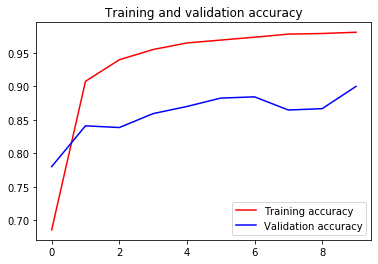

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Model 2 - CNN2

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit_generator(train_generator, steps_per_epoch = 1000,epochs = 10, validation_data = val_generator, verbose = 1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 128)       0         
_

Model 2 - Accuracy

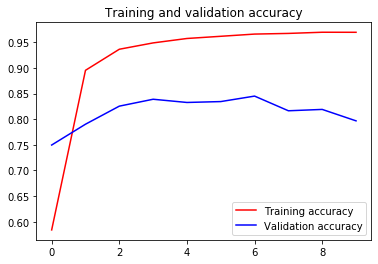

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Model 3 - pre-trained VGG 16

In [11]:
pretrained_model = VGG16(weights = 'imagenet', include_top=False, input_shape=target_dims)

base_model = pretrained_model # Topless

# Add top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.01), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Train top layer
for layer in base_model.layers:
    layer.trainable = False

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch = 1000,epochs = 10, validation_data = val_generator, verbose = 1)


58892288/58889256 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
___________________________________________________________

Model 3 - Accuracy

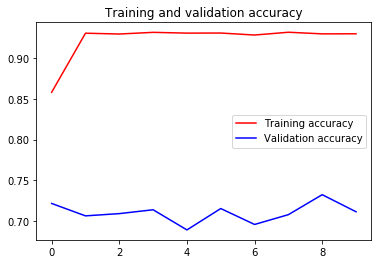

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Model 4 - InceptionV3

In [14]:
data_dir = "/tmp/asl_alphabet_train/asl_alphabet_train"
target_size = (75, 75)
target_dims = (75, 75, 3) # add channel for RGB
n_classes = 29
val_frac = 0.2
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [15]:
pretrained_model = InceptionV3(weights = 'imagenet', include_top=False, input_shape=target_dims)

base_model = pretrained_model # Topless

# Add top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.01), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Train top layer
for layer in base_model.layers:
    layer.trainable = False

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit_generator(train_generator, steps_per_epoch = 1000,epochs = 10, validation_data = val_generator, verbose = 1)



87916544/87910968 [==============================] - 3s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
_________________________

KeyboardInterrupt: ignored

Model 4 - Accuracy

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Model 5 - Fine tuning Inception

In [16]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(n_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit_generator(train_generator, steps_per_epoch = 1000,epochs = 5, validation_data = val_generator, verbose = 1)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit_generator(train_generator, steps_per_epoch = 1000,epochs = 10, validation_data = val_generator, verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 98s 98ms/step - loss: 1.8066 - val_loss: 11.0931
Epoch 2/5
1000/1000 [==============================] - 94s 94ms/step - loss: 1.1964 - val_loss: 10.6638
Epoch 3/5
1000/1000 [==============================] - 95s 95ms/step - loss: 0.9890 - val_loss: 10.2033
Epoch 4/5
1000/1000 [==============================] - 94s 94ms/step - loss: 0.8528 - val_loss: 10.0160
Epoch 5/5
1000/1000 [==============================] - 95s 95ms/step - loss: 0.7595 - val_loss: 11.1319
0 input_3
1 conv2d_101
2 batch_normalization_95
3 activation_95
4 conv2d_102
5 batch_normalization_96
6 activation_96
7 conv2d_103
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_104
12 batch_normalization_98
13 activation_98
14 conv2d_105
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_109
19 batch_normalization_103
20 activation_103
21 conv2d_107
22 conv2d_110
23 batch_normalization_101
24 batch_normalization_104
25 activation_1

KeyboardInterrupt: ignored

Model 5 - Accuracy

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Predicting test data

In [23]:
import numpy as np
from keras.preprocessing import image

test_path = '/tmp/asl_alphabet_test/asl_alphabet_test'
files = os.listdir(test_path)

for file in files:
  full_file = os.path.join(test_path,file)
  img = image.load_img(full_file, target_size=image_size)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(file)
  print(classes)

Z_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0.]]
space_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1.]]
U_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0.]]
X_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0.]]
A_test.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
V_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0.]]
H_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
M_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
B_test.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Q_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=image_size)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving O_test.jpg to O_test.jpg
O_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
